# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat8"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [7]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 0.8235012590885162
Epoch 1, Loss 0.8361627161502838
Epoch 2, Loss 0.8731211423873901
Epoch 3, Loss 0.8296302258968353
Epoch 4, Loss 0.7541002035140991
Epoch 5, Loss 0.8304384648799896
Epoch 6, Loss 0.876446932554245
Epoch 7, Loss 0.8488412201404572
Epoch 8, Loss 0.8525399267673492
Epoch 9, Loss 0.8411940336227417
Epoch 10, Loss 0.9514891505241394
Epoch 11, Loss 0.8520344197750092
Epoch 12, Loss 0.8414815366268158
Epoch 13, Loss 0.8917041122913361
Epoch 14, Loss 0.8273738026618958
Epoch 15, Loss 0.8374113142490387
Epoch 16, Loss 0.8183015584945679
Epoch 17, Loss 0.774603009223938
Epoch 18, Loss 0.8244290947914124
Epoch 19, Loss 0.8414277732372284
Epoch 20, Loss 0.8508798480033875
Epoch 21, Loss 0.8707375526428223
Epoch 22, Loss 0.8512866497039795
Epoch 23, Loss 0.8468879461288452
Epoch 24, Loss 0.8606744110584259
Epoch 25, Loss 0.7952224314212799
Epoch 26, Loss 0.8192434012889862
Epoch 27, Loss 0.9694430232048035
Epoch 28, Loss 0.7963740229606628
Epoch 29, Loss 0.886819899

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

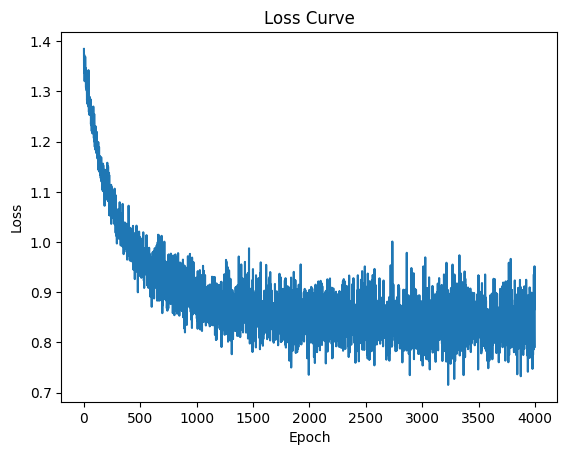

In [8]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 73.6842105263158%
Accuracy for class 1 = 60.0%
Overall accuracy = 70.83333333333333%
Accuracy for class 0 = 78.37837837837837%
Accuracy for class 1 = 81.81818181818181%
Overall accuracy = 79.16666666666667%


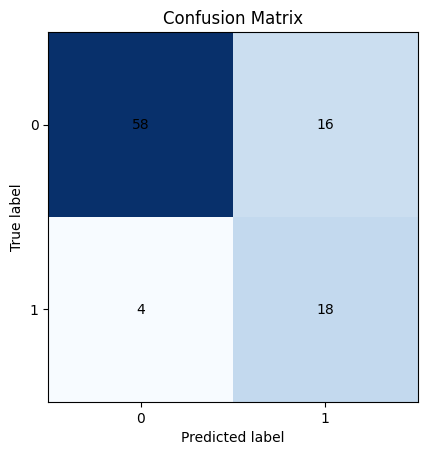

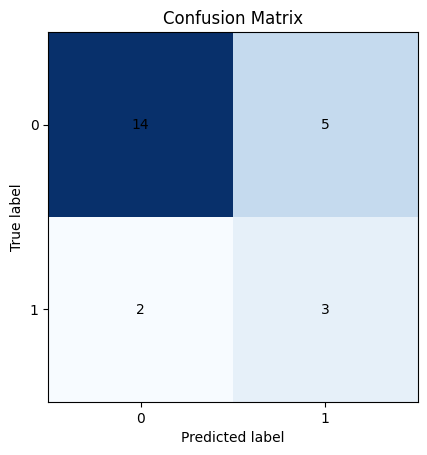

In [9]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

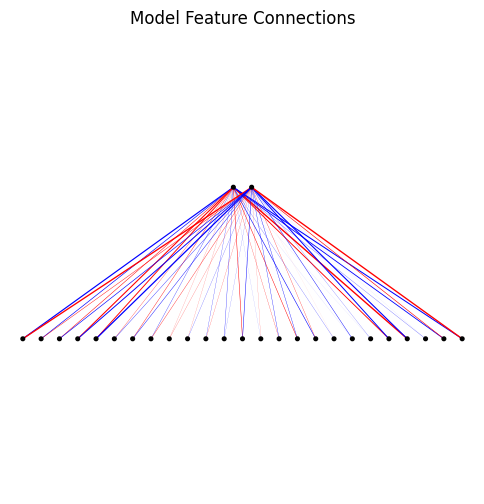

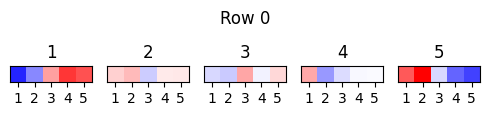

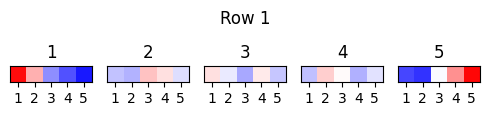

In [10]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)